# 채무불이행 분류

## 1. 데이터 탐색

In [56]:
import pandas as pd
import numpy as np

train = pd.read_csv('C:/wanted/data/2월/DACON/채무불이행/train.csv')
test = pd.read_csv('C:/wanted/data/2월/DACON/채무불이행/test.csv')
sample = pd.read_csv('C:/wanted/data/2월/DACON/채무불이행/sample_submission.csv')

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [58]:
train.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,1.175265e+06,0.62620,30.889200,0.373200,5.061200e+05,3.649126e+05,22367.28075,744.215000,0.341200
std,1.434430e+06,0.714304,4.620572,7.206693,1.604199e+06,1.23419,20.011561,0.843797,2.831462e+05,3.537942e+05,15186.49738,56.995698,0.474136
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000e+00,0.00000,0.000000,0.000000,2.917650e+04,0.000000e+00,0.00000,502.000000,0.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,4.482476e+05,0.00000,14.000000,0.000000,3.001901e+05,1.471856e+05,10893.75000,704.000000,0.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,7.670910e+05,0.00000,28.000000,0.000000,4.743412e+05,2.547930e+05,20160.00000,756.000000,0.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,1.147283e+06,1.00000,41.000000,0.000000,5.919079e+05,4.749180e+05,30647.25000,793.000000,1.000000
max,1.722975e+07,7.000000,35.000000,51.700000,2.323233e+07,7.00000,88.000000,3.000000,1.373613e+06,3.946300e+06,153574.50000,825.000000,1.000000


In [59]:
head_tail = pd.concat([train.head(5), train.tail(5)]).reset_index(drop=True)
head_tail

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0
5,TRAIN_09995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,0,부채 통합,단기 상환,126216.0,177028.5,6237.0,755,0
6,TRAIN_09996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,0,주택 개보수,장기 상환,371907.0,347449.5,53301.0,707,0
7,TRAIN_09997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,0,부채 통합,장기 상환,869736.0,176905.5,11436.0,733,0
8,TRAIN_09998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,0,부채 통합,단기 상환,443008.5,139294.5,25567.5,696,0
9,TRAIN_09999,주택 담보 대출 (거주 중),2175133.5,5년,0.0,5,24.9,52999.5,0,9,0,주택 개보수,장기 상환,1152918.0,106930.5,12676.5,676,0


In [60]:
train.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [61]:
abs(train.corr(numeric_only=True)['채무 불이행 여부']).drop('채무 불이행 여부').sort_values()

현재 미상환 신용액           0.000048
마지막 연체 이후 경과 개월 수    0.012058
월 상환 부채액             0.020135
체납 세금 압류 횟수          0.030419
현재 대출 잔액             0.033052
신용 문제 발생 횟수          0.044847
최대 신용한도              0.044997
신용 점수                0.095783
신용 거래 연수             0.108856
개인 파산 횟수             0.115900
연간 소득                0.120499
개설된 신용계좌 수           0.169900
Name: 채무 불이행 여부, dtype: float64

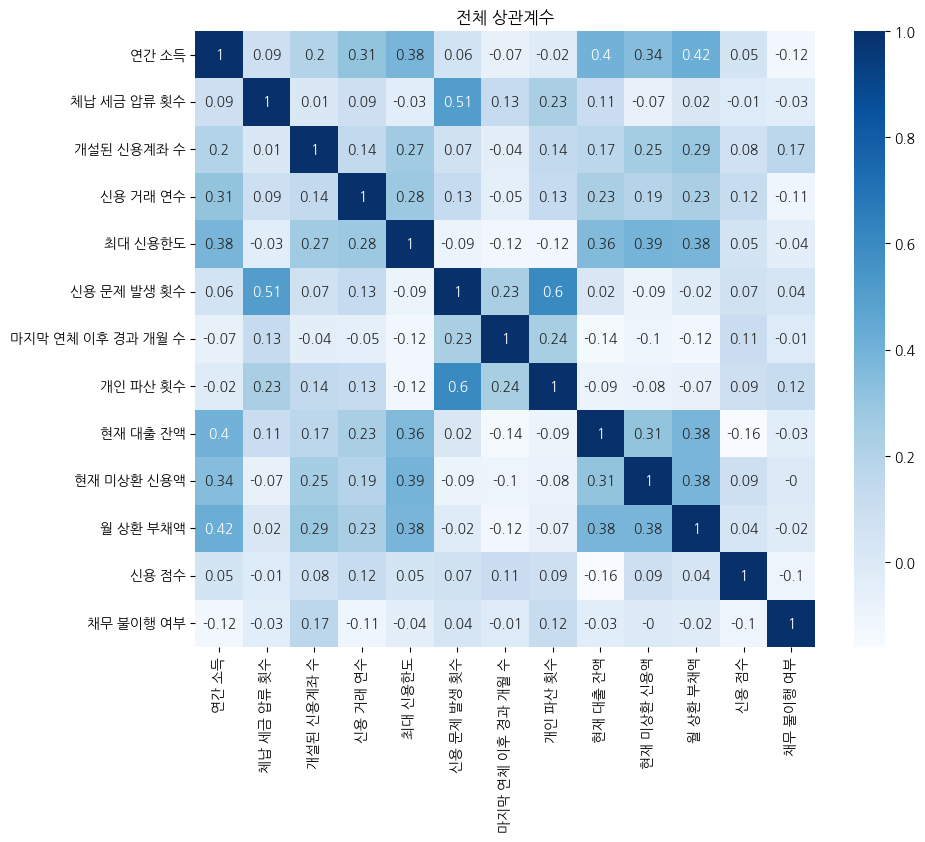

In [62]:
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

corr = train.corr(numeric_only=True).round(2)
plt.figure(figsize=[10,8])
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title('전체 상관계수')
plt.show()

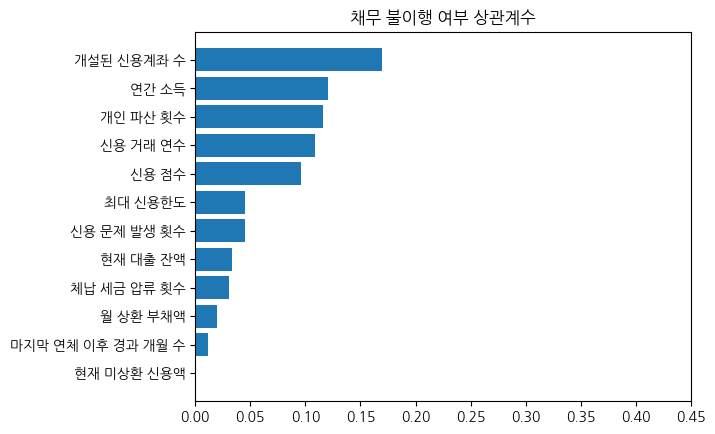

In [64]:
label_corr = abs(train.corr(numeric_only=True)['채무 불이행 여부']).drop('채무 불이행 여부').sort_values()
plt.barh(label_corr.index, label_corr.values)
plt.title('채무 불이행 여부 상관계수')
plt.xticks(np.arange(0, 0.5, 0.05))
plt.show()

In [32]:
column_value = {}

for i,col in enumerate(train.columns):
    if i == 0:
        continue

    if len(train[col].value_counts()) <= 15:
        column_value[col] = train[col].value_counts()
        print(train[col].value_counts())
    else:
        column_value[col] = "종류가 너무 많음"
        print(f"{col}의 종류가 너무 많음")



주거 형태
월세                  4050
주택 담보 대출 (거주 중)     3633
자가                  2241
주택 담보 대출 (비거주 중)      76
Name: count, dtype: int64
연간 소득의 종류가 너무 많음
현재 직장 근속 연수
10년 이상    3828
2년        1225
8년         841
5년         729
7년         619
1년         581
4년         541
3년         523
1년 미만      488
6년         357
9년         268
Name: count, dtype: int64
체납 세금 압류 횟수
0.0    8826
1.0     884
4.0     176
2.0      60
5.0      37
7.0      10
3.0       4
6.0       3
Name: count, dtype: int64
개설된 신용계좌 수의 종류가 너무 많음
신용 거래 연수의 종류가 너무 많음
최대 신용한도의 종류가 너무 많음
신용 문제 발생 횟수
0    6621
1    2149
2     689
5     248
6     157
4      93
3      30
7      13
Name: count, dtype: int64
마지막 연체 이후 경과 개월 수의 종류가 너무 많음
개인 파산 횟수
0    7886
1    1268
3     772
2      74
Name: count, dtype: int64
대출 목적
부채 통합        7294
기타            970
주택 개보수        909
사업 대출         254
여행 자금         173
의료비           158
자동차 구매         95
고액 구매          68
소규모 사업 자금      26
주택 구매          26
결혼 자금          14
휴가 비용           6
이사 비용    

In [82]:
for key,val in train[['대출 목적','채무 불이행 여부']].value_counts().items():
    print(key,val)


('부채 통합', 0) 4387
('부채 통합', 1) 2907
('기타', 0) 759
('주택 개보수', 0) 750
('기타', 1) 211
('사업 대출', 0) 207
('주택 개보수', 1) 159
('여행 자금', 0) 145
('의료비', 0) 127
('자동차 구매', 0) 82
('고액 구매', 0) 60
('사업 대출', 1) 47
('의료비', 1) 31
('여행 자금', 1) 28
('소규모 사업 자금', 0) 26
('주택 구매', 0) 22
('자동차 구매', 1) 13
('결혼 자금', 0) 12
('고액 구매', 1) 8
('이사 비용', 0) 4
('주택 구매', 1) 4
('휴가 비용', 0) 4
('교육비', 0) 3
('결혼 자금', 1) 2
('휴가 비용', 1) 2


In [ ]:
def category(data, col):
    data[[col,'채무 불이행 여부']].value_counts()

채무 불이행 여부
0    922
1    303
Name: count, dtype: int64